## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# We have no missing data^

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


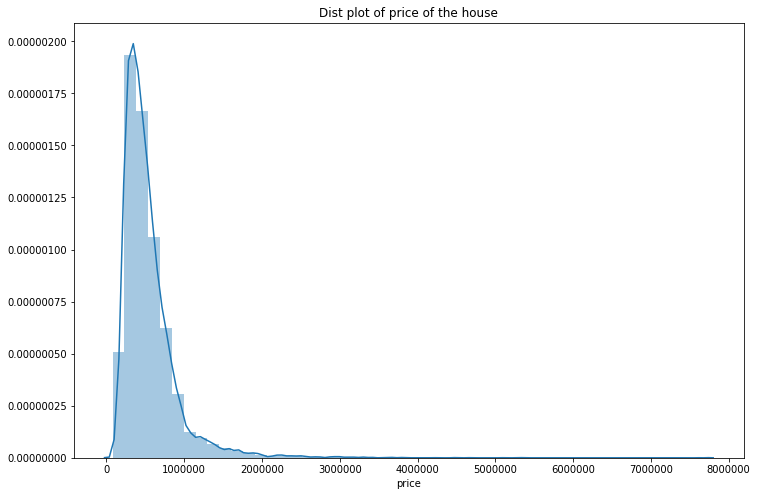

In [15]:
plt.figure(figsize=(12,8))
plt.title('Dist plot of price of the house')
sns.distplot(df['price'])

In [16]:
# Looks like majority of the houses are between 100000 to 200000

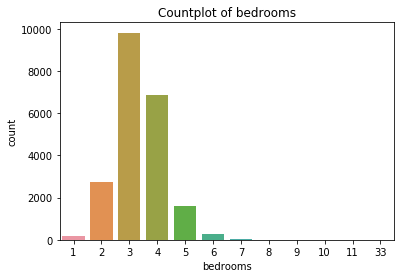

In [17]:
plt.title('Countplot of bedrooms')
sns.countplot(df['bedrooms'])

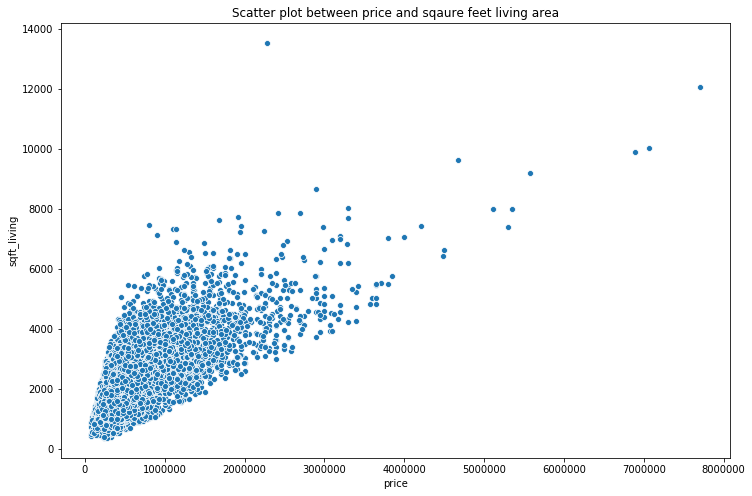

In [18]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot between price and sqaure feet living area')
sns.scatterplot(x='price',y='sqft_living',data=df)

In [20]:
# Clear positive correlation between price of the house and living area by sqaure feet^

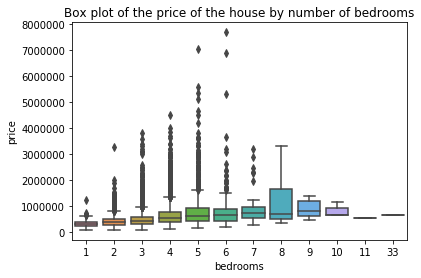

In [22]:
plt.title('Box plot of the price of the house by number of bedrooms')
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

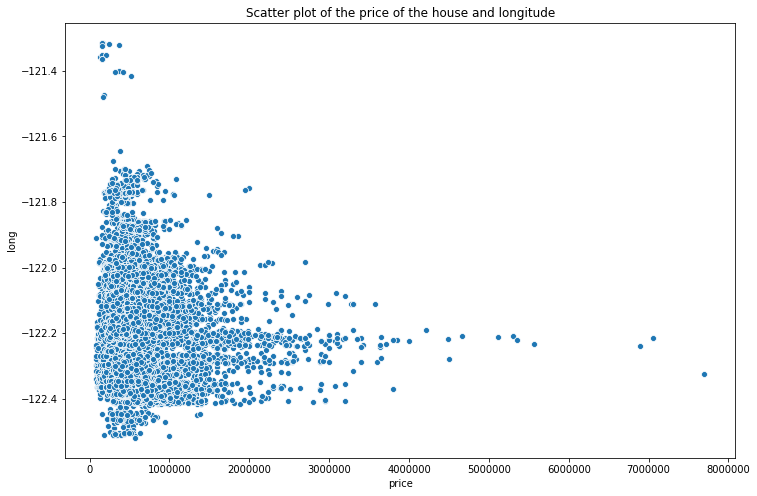

In [23]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot of the price of the house and longitude')
sns.scatterplot(x='price',y='long',data=df)

In [24]:
#There seems to be some relation between a house and it's longitude location

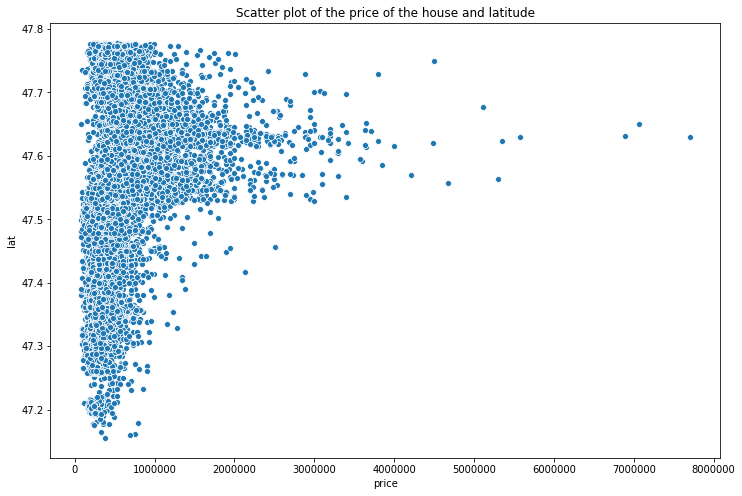

In [25]:
plt.figure(figsize=(12,8))
plt.title('Scatter plot of the price of the house and latitude')
sns.scatterplot(x='price',y='lat',data=df)

In [26]:
# Similarly, there seems to be some relation between a house and it's latitude location

In [27]:
# Let's try to looks at them togethar to see if there is a geographical reason for the price of the house

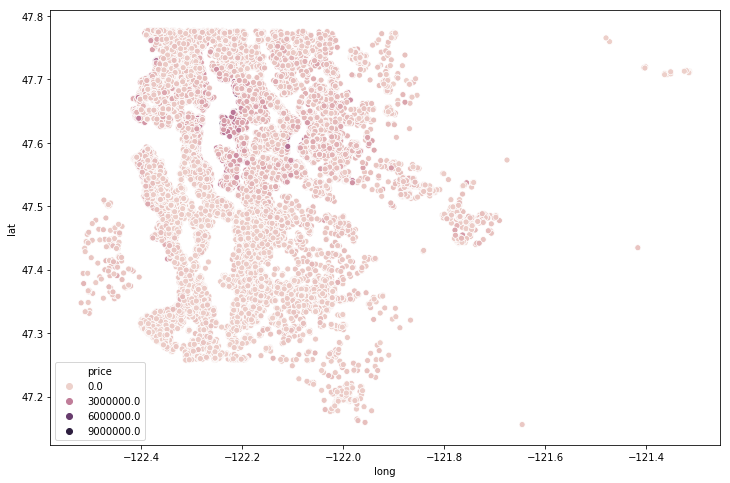

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [38]:
#We cannot clearly see since there are some extreme outliers in the data. in the next step, we will remove these extreme outliers and then view the houses geagrapicially once again.

In [39]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [40]:
len(df)*(0.01) #1 % on the most expensive house -->Outliers

215.97

In [41]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #The whole data without those 1 percent most exp houses

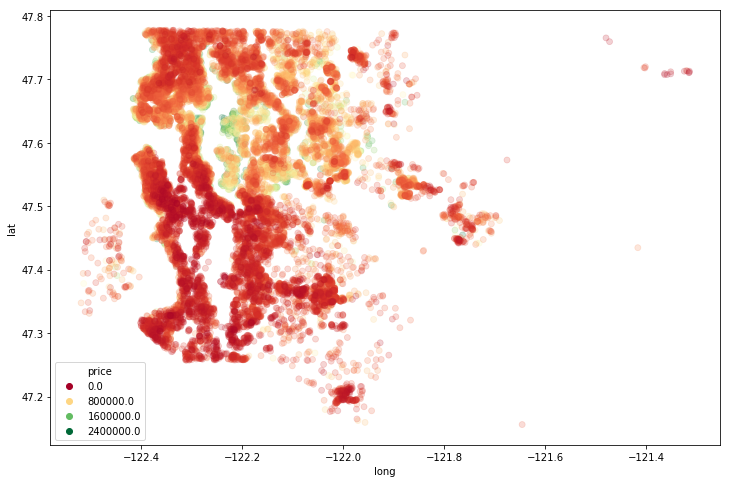

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

In [43]:
# You can clearly see that houses around the waterfront (Green) are the most expenisve which makes sense since houses around a water body are generally expensive

### Other Features

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


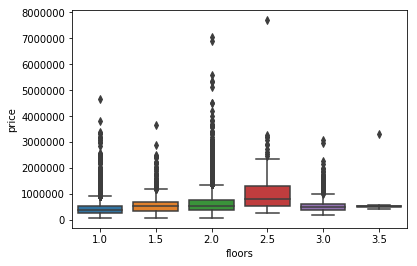

In [37]:
sns.boxplot(x='floors',y='price',data=df)

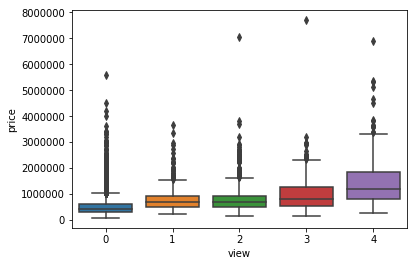

In [36]:
sns.boxplot(x='view',y='price',data=df)

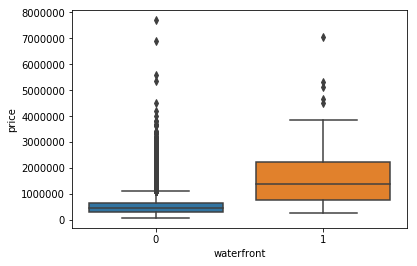

In [20]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [44]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [46]:
df = df.drop('id',axis=1)

In [47]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [48]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df['month'] = df['date'].apply(lambda date:date.month)

In [50]:
df['year'] = df['date'].apply(lambda date:date.year)

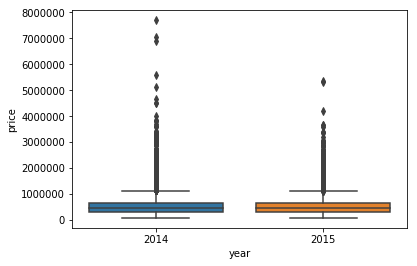

In [51]:
sns.boxplot(x='year',y='price',data=df)

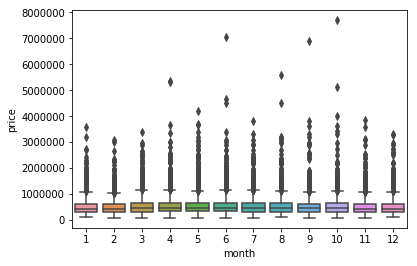

In [52]:
sns.boxplot(x='month',y='price',data=df)

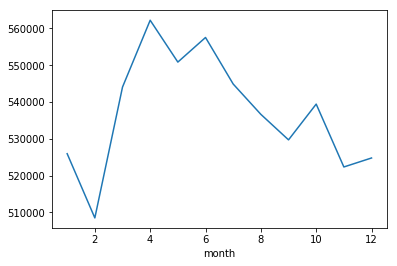

In [53]:
df.groupby('month').mean()['price'].plot()

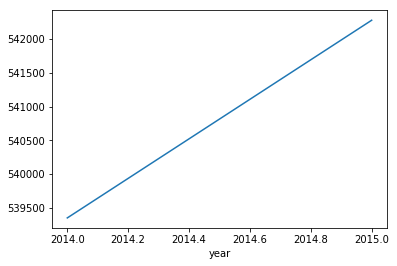

In [54]:
df.groupby('year').mean()['price'].plot()

In [55]:
df = df.drop('date',axis=1)

In [56]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [57]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [58]:
df = df.drop('zipcode',axis=1)

In [59]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [61]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [62]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [63]:
X = df.drop('price',axis=1)
y = df['price']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train= scaler.fit_transform(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [69]:
X_test = scaler.transform(X_test)

In [70]:
X_train.shape

(15117, 19)

In [71]:
X_test.shape

(6480, 19)

## Creating a Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [73]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [74]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 6ms/step - loss: 429015358122.6667 - val_loss: 418927575040.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 423560592042.6667 - val_loss: 415943622656.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 420512351300.2667 - val_loss: 387996778496.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 371783324467.2000 - val_loss: 282979270656.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 245280101853.8667 - val_loss: 133746188288.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 131136176605.8667 - val_loss: 95614795776.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 93563220787.2000 - val_loss: 93794230272.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 92483128866.1333 - val_loss: 92285067264.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 40493612987.7333 - val_loss: 37036462080.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 40119218073.6000 - val_loss: 36705779712.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 38436322824.5333 - val_loss: 36520435712.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 34960669405.8667 - val_loss: 36382171136.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 39672139741.8667 - val_loss: 36166127616.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 35468466090.6667 - val_loss: 36033196032.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 36351857186.1333 - val_loss: 35883610112.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 36490826786.1333 - val_loss: 35727634432.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 34786036667.7333 - val_loss: 32124250112.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 35464468633.6000 - val_loss: 31922778112.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33926101111.4667 - val_loss: 31921893376.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33858483916.8000 - val_loss: 31926437888.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 34199889237.3333 - val_loss: 31785246720.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 33258840439.4667 - val_loss: 31766028288.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32198042385.0667 - val_loss: 31863121920.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 35454369587.2000 - val_loss: 31689807872.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 30766727014.4000 - val_loss: 30072803328.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 30020105847.4667 - val_loss: 30136547328.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 30047715592.5333 - val_loss: 30051266560.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 30763558365.8667 - val_loss: 30029955072.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31671047253.3333 - val_loss: 30089934848.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31688439057.0667 - val_loss: 29987129344.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31562225339.7333 - val_loss: 29957613568.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 33641287082.6667 - val_loss: 29952555008.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 31313392452.2667 - val_loss: 29001580544.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30711573435.7333 - val_loss: 28963190784.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 31122140484.2667 - val_loss: 29012385792.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 31585340979.2000 - val_loss: 28957448192.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30107139720.5333 - val_loss: 28941086720.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30473609625.6000 - val_loss: 28972722176.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30023761510.4000 - val_loss: 28900237312.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 29788997649.0667 - val_loss: 28882114560.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30489455718.4000 - val_loss: 28127315968.0000
Epoch 334/400
119/119 [==============================] - 1s 7ms/step - loss: 29283922005.3333 - val_loss: 28141361152.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29056920234.6667 - val_loss: 28105127936.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 29321252283.7333 - val_loss: 28192086016.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 28886052044.8000 - val_loss: 28103659520.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29089672260.2667 - val_loss: 28079009792.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29975792170.6667 - val_loss: 28098091008.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 31141977309.8667 - val_loss: 28072300544.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28986973235.2000 - val_loss: 27499280384.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29732472678.4000 - val_loss: 27425292288.0000


In [75]:
losses = pd.DataFrame(model.history.history)

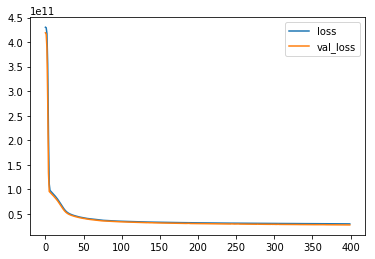

In [76]:
losses.plot()

# Evaluation on Test Data


In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [78]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [79]:
predictions = model.predict(X_test)

In [80]:
mean_absolute_error(y_test,predictions)

101576.20657552083

In [81]:
np.sqrt(mean_squared_error(y_test,predictions))

165605.82493024468

In [82]:
explained_variance_score(y_test,predictions)

0.7932074232109334

In [83]:
df['price'].mean()

540296.5735055795

In [84]:
df['price'].median()

450000.0

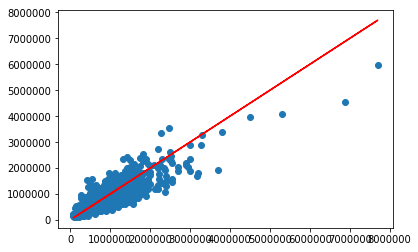

In [86]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [87]:
errors = y_test.values.reshape(6480, 1) - predictions

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


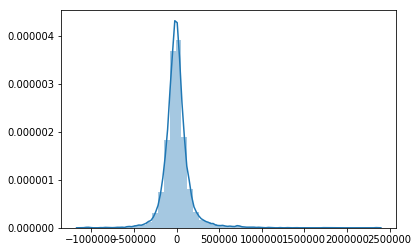

In [88]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [89]:
single_house = df.drop('price',axis=1).iloc[0]

In [90]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [91]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [92]:
model.predict(single_house)

array([[282431.72]], dtype=float32)

In [93]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64